<a href="https://colab.research.google.com/github/g9772690/lecture_etc/blob/main/boston_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

머신러닝 프로젝트
머신러닝은 데이터안에서 패턴(규칙)을 찾아내어 학습하고 결과를 예측하는 분석방법으로 인공지능의 한 분야다. 머신러닝은 해결해야 할 문제와 관련된 데이터가 많고 빠르게 변화하는 빅데이터 환경에 적합한 효과적인 분석방법이다. 머신러닝의 학습유형은 크게 지도학습과 비지도학습으로 나눌수 있으며, 머신러닝으로 해결하는 주요 문제유형은 회귀와 분류, 군집이 있다. 
파이썬의 머신러닝 라이브러리인 사이킷런(scikit-learn)을 이용하여 회귀분석을 수행한다.

1) 환경에 따른 주택가격 예측하기 
- 보스턴 주택가격 데이터에 머신러닝 기반의 회귀분석을 수행하여 주택가격에 영향을 미치는 환경변수를 확인하고 그에 따른 주택가격을 예측한다.
- 데이터는 사이킷런에 내장된 데이터셋을 이용하도록 한다.
- 머신러닝의 프로세스
  1) 데이터수집 -> 2) 데이터 전처리 및 훈련/테스트 데이터 분할 -> 3) 모델 
     구축 및 학습 -> 4) 모델 평가 -> 5) 예측
  2) 분석 평가 지표 : 예측값과 실제값의 차이인 오류의 크기. 절대값 평균 혹은 
     제곱평균의 제곱근 또는 분산비율을 이용   

In [ ]:
pip install sklearn

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import  load_boston
boston=load_boston()

보스톤 주택가격 데이터셋을 사용하기 위해 데이텃셋을 로드하여 boston 객체를 생성하였다.

In [ ]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

데이터셋에 대한 설명

In [ ]:
boston_df=pd.DataFrame(boston.data,columns=boston.feature_names)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


데이터셋 객체의 data 배열(boston.data), 즉 독립변수 x가 되는 피처들을 데이터프레임 자료형으로 변환하여 boston_df 를 생성

In [ ]:
boston_df['PRICE']=boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


종속변수인 주택가격 컬럼을 boston_df 에 추가한다. 

In [ ]:
boston_df.shape

(506, 14)

데이터셋의 형태, 즉 행의개수와 열의 개수를 확인

In [ ]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


bpston_df 에 대한 정보 확인
14개 독립변수, 즉 피처의 의미는 다음과 같다.

1. CRIM : 지역별 범죄 발생률
2. ZN : 25,000 평방피트를 초과하는 거주지역 비율
3. INDUS : 비상업 지역의 넓이 비율
4. CHAS : 찰스강의 더미변수(1은 강의 경계, 0은 경계 아님)
5. NOX : 일산화질소 농도
6. RM : 거주할 수 있는 방 개수
7. AGE : 1940년 이전에 건축된 주택 비율
8. DIS : 5개 주요 고용센터까지 가중거리
9. RAD : 고속도로 접근 용이도
10. TAX :10,000 달러당 재산세 비율
11. PTRATIO : 지역의 교사와 학생의 비율
12. B : 지역의 흑인 거주 비율
13. LSTAT : 하위 계층의 비율
14. PRICE(MEDV) : 본인 소유 주택가격의 중앙값







In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import  train_test_split
from sklearn.metrics import mean_squared_error, r2_score

회귀분석을 위한 LinearRegression 과 데이터셋 분리 작업을 위한 train_test_split, 성능측정을 위한 평가 지표인 mean_squared_erro, r2_score 를 임포트 한다.

In [ ]:
Y=boston_df['PRICE']
X=boston_df.drop(['PRICE'],axis=1, inplace=False)

X, Y 를 분리..Y를 회귀식의 종속변수로 설정하고 PRICE 를 제외한 나머지 피처를 독립변수 X로 설정

In [ ]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.3,random_state=156)

X와 Y 데이터 506개를 학습데이터와 평가데이터로 7:3의 비율로 분할

In [ ]:
lr=LinearRegression()

선형 회귀분석 모델 객체 lr을 생성

In [ ]:
lr.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

학습데이터를 이용하여 학습을 수행한다

In [ ]:
Y_predict=lr.predict(X_test)

선형회귀분석 : 평가데이터에 대한 예측 수행 -> 예측 결과 Y_predict 를 구한다.

In [ ]:
mse=mean_squared_error(Y_test,Y_predict)
rmse=np.sqrt(mse)
print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('R^2(Variance score) : {0:.3f}'.format(r2_score(Y_test,Y_predict)))

MSE : 17.297, RMSE : 4.159
R^2(Variance score) : 0.757


회귀분석은 지도학습이므로 평가 데이터 X에 대한 결과값 Y를 이미 알고 있는 상태에서 평가데이터 Y_test 와 Y_predict 의 오차를 계산하여 모델을 평가한다.

In [ ]:
print('Y 절편 값 : ', lr.intercept_)
print('회귀계수의 값 : ',np.round(lr.coef_,1))

Y 절편 값 :  40.995595172164755
회귀계수의 값 :  [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


선형회귀의 Y절편과 각 피처의 회귀계수를 확인한다.

In [ ]:
coef=pd.Series(data=np.round(lr.coef_,2), index=X.columns)
coef.sort_values(ascending=False)

RM          3.35
CHAS        3.05
RAD         0.36
ZN          0.07
INDUS       0.03
B           0.01
AGE         0.01
TAX        -0.01
CRIM       -0.11
LSTAT      -0.57
PTRATIO    -0.92
DIS        -1.74
NOX       -19.80
dtype: float64

회귀모델에서 구한 회귀계수값과 피처이름을 묶어 시리즈 자료형으로 만들고 회귀계수값을 기준으로 내림차순 정렬하여 확인

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

회귀분석결과를 산점도 +선형 회귀 그래프로 시각화하기 위해 필요한 라이브러리 임포트

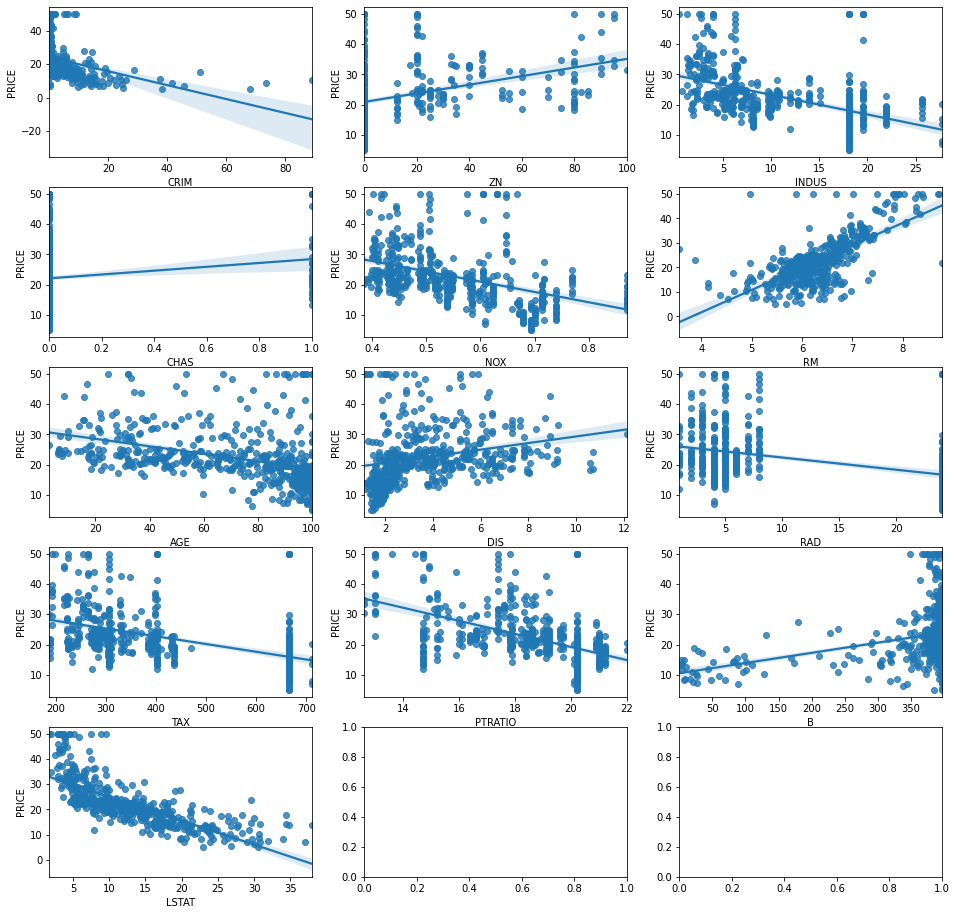

In [ ]:
fig, axs=plt.subplots(figsize=(16,16), ncols=3,nrows=5)
x_features=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']
for i, feature in enumerate(x_features):
  row=int(i/3)
  col=i%3
  sns.regplot(x=feature, y='PRICE', data=boston_df,ax=axs[row][col])